In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import pylab as pl
from PIL import Image
import numpy as np

In [123]:
from os import listdir
from os.path import isdir
from os.path import join
digits_new = {}
data = []
target = []
container_path = 'training_set'
folders = [f for f in sorted(listdir(container_path)) if isdir(join(container_path, f))]
#print folders
for folder in folders:
    folder_path = join(container_path, folder)
    #print folder
    documents = [join(folder_path, d) for d in sorted(listdir(folder_path))]
    for pic in documents:
        if not pic.endswith('png'):
            continue
        pil_im = Image.open(pic, 'r')
        data.append(np.asarray(pil_im).ravel())
        target.append(int(folder))
        #print np.asarray(pil_im).ravel().shape
        #plt.imshow(np.asarray(pil_im))
digits_new['data']=data
digits_new['target']=target
#print digits_new


# convert to array for fancy indexing
#filenames = np.array(filenames)
#target = np.array(target)

digits = datasets.load_digits()
print digits.keys()
print digits['images'].shape
print digits['data'].shape
print digits['target_names'].shape
print digits['target'].shape
print digits['target'][12]

['images', 'data', 'target_names', 'DESCR', 'target']
(1797, 8, 8)
(1797, 64)
(10,)
(1797,)
2


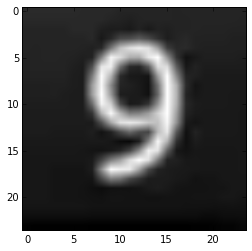

[2]


In [125]:
from sklearn import svm
clf = svm.SVC()
#clf.fit(digits.data[:-1], digits.target[:-1])
clf.fit(digits_new['data'][:-5], digits_new['target'][:-5])
plt.imshow(digits_new['data'][-4].reshape(24,24))
plt.show()
#print digits_new['data'][-1].reshape(24,24)
print clf.predict(digits_new['data'][-4])

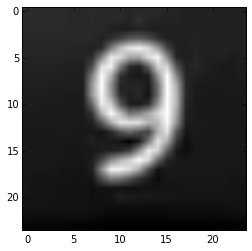

9
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


In [129]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(digits_new['data'][:-5], digits_new['target'][:-5])
plt.imshow(digits_new['data'][-2].reshape(24,24))
plt.show()
print int(neigh.predict(digits_new['data'][-2]))
print neigh.predict_proba(digits_new['data'][-2])

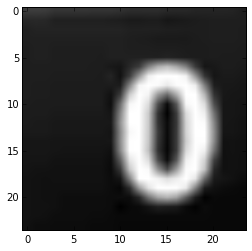

(24, 24)
(24, 24)
[1]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [128]:
pil_im = Image.open('training_set/test.png', 'r').convert('L')
plt.imshow(np.asarray(pil_im))
plt.show()
# pil_im.thumbnail((8,8), Image.ANTIALIAS)
# plt.imshow(np.asarray(pil_im))
# plt.show()
print np.asarray(pil_im).shape
print np.asarray(pil_im).shape
print neigh.predict(np.asarray(pil_im).ravel())
print neigh.predict_proba(np.asarray(pil_im).ravel())